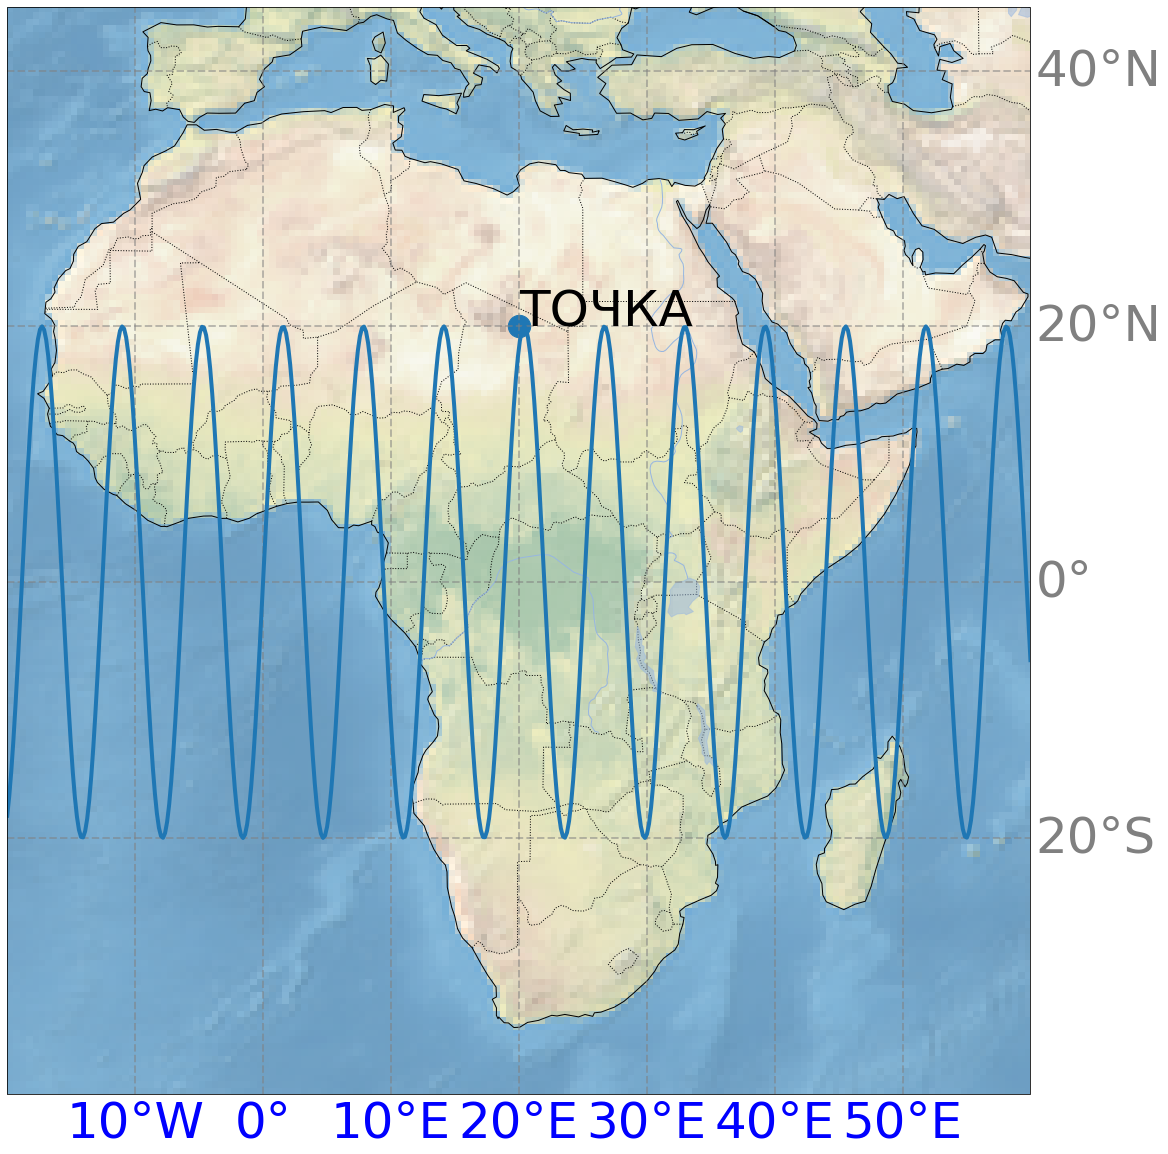

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

fig = plt.figure(figsize = (20, 20))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())

ax.stock_img()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_left = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 50, 'color': 'gray'}
gl.xlabel_style = {'size': 50, 'color': 'blue'}


plt.scatter([20], [20], s=500)
plt.text(20, 20, "ТОЧКА",size=50)

x = np.linspace(-20, 60, 500)
plt.plot(x, 20*np.sin(x), lw=4)




plt.savefig("pic.png")

plt.show()


<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known><urlopen error [Errno -2] Name or service not known><urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>

<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>

<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not 

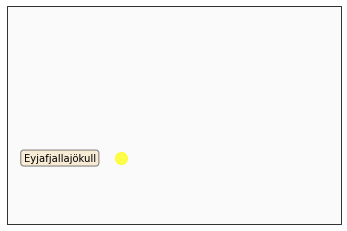

In [33]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt



# Create a MapQuest open aerial instance.
map_quest_aerial = cimgt.MapQuestOpenAerial()

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_quest_aerial.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-22, -15, 63, 65])

# Add the MapQuest data at zoom level 8.
ax.add_image(map_quest_aerial, 8)

# Add a marker for the Eyjafjallajökull volcano.
plt.plot(-19.613333, 63.62, marker='o', color='yellow', markersize=12,
         alpha=0.7, transform=ccrs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
plt.text(-19.613333, 63.62, u'Eyjafjallajökull',
         verticalalignment='center', horizontalalignment='right',
         transform=text_transform,
         bbox=dict(facecolor='wheat', alpha=0.5, boxstyle='round'))
plt.show()


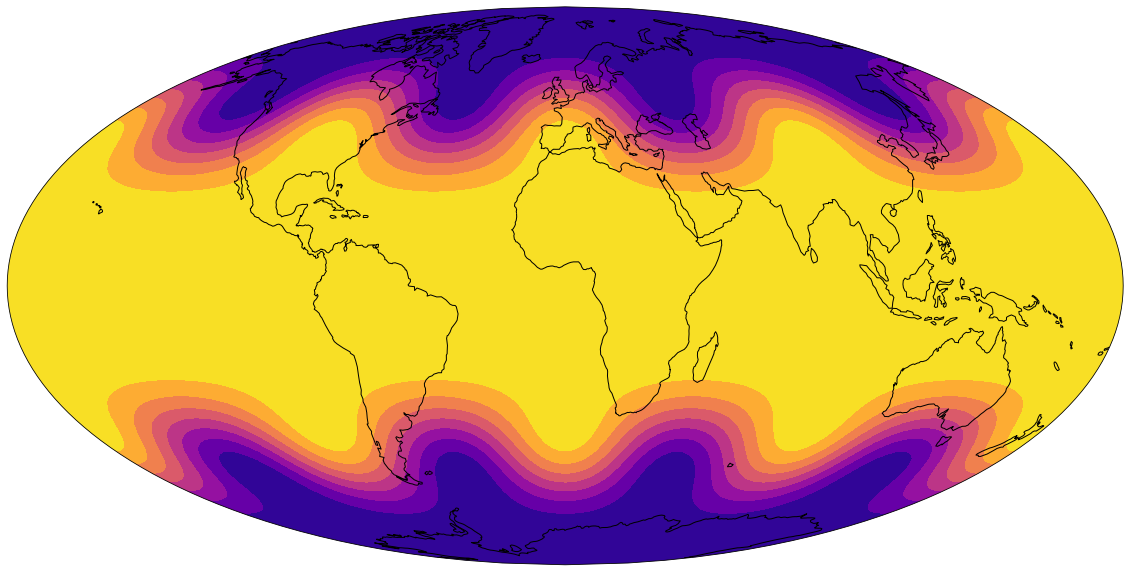

In [39]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs


def sample_data(shape=(73, 145)):
    """Returns ``lons``, ``lats`` and ``data`` of some fake data."""
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data



plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.Mollweide())

lons, lats, data = sample_data()

ax.contourf(lons, lats, data,
            transform=ccrs.PlateCarree(),
            cmap='plasma')
ax.coastlines()
ax.set_global()
plt.show()


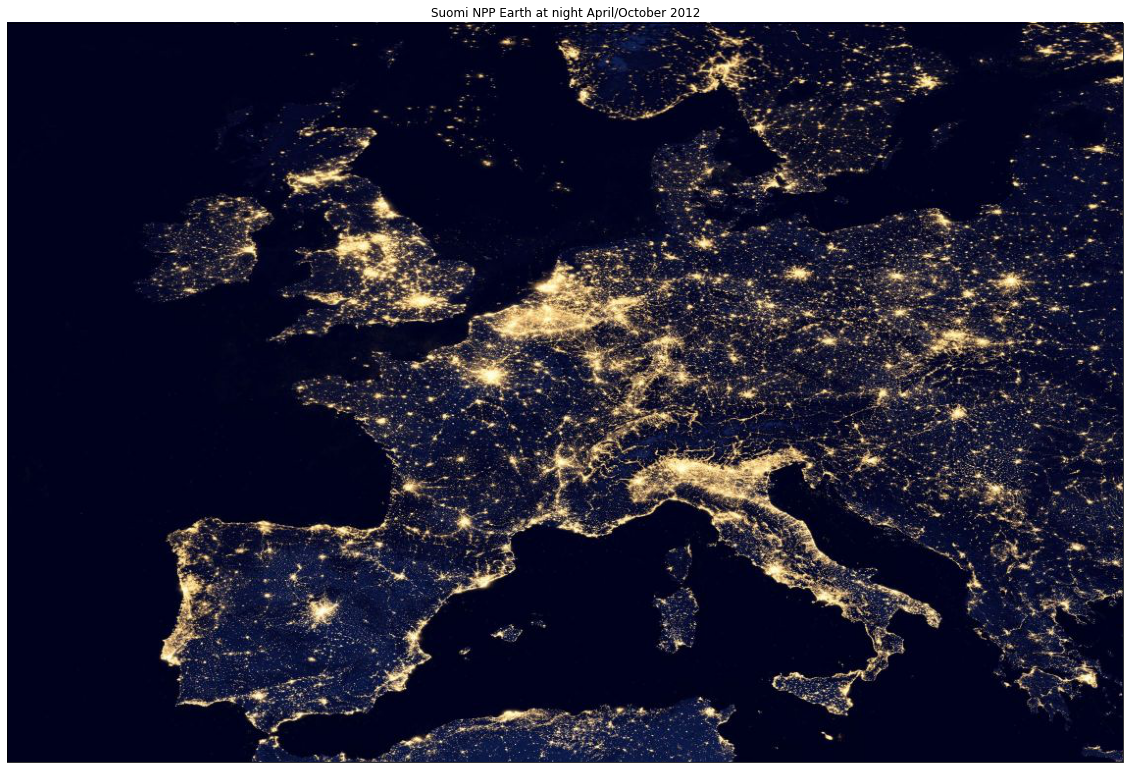

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt



url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'VIIRS_CityLights_2012'

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_wmts(url, layer)
ax.set_extent((-15, 25, 35, 60))

plt.title('Suomi NPP Earth at night April/October 2012')
plt.show()


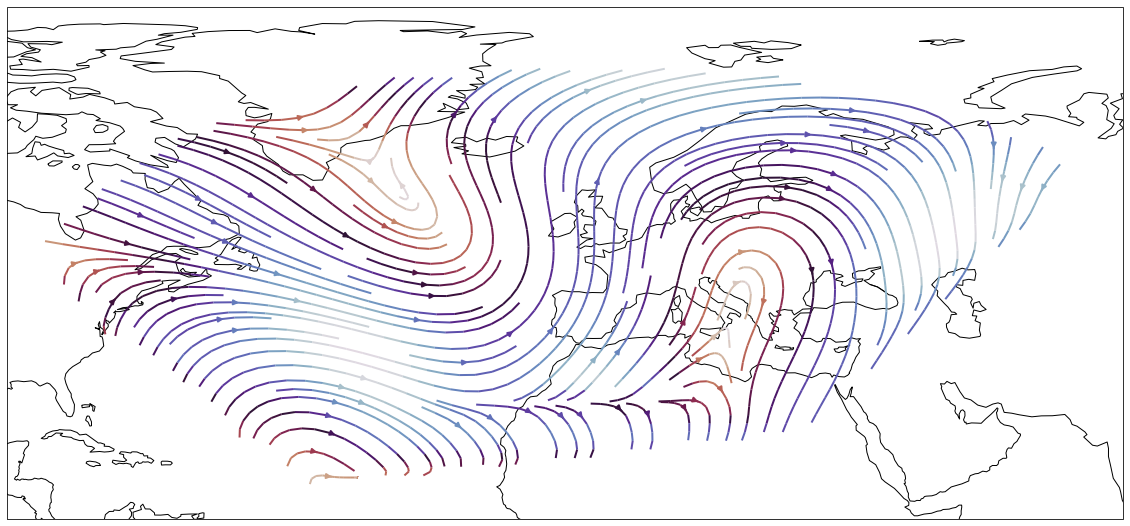

In [10]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data


plt.figure(figsize=(20, 20))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-90, 75, 10, 60])
ax.coastlines()

x, y, u, v, vector_crs = sample_data(shape=(80, 100))
magnitude = (u ** 2 + v ** 2) ** 0.5
ax.streamplot(x, y, u, v, transform=vector_crs,
              linewidth=2, density=2, color=magnitude, cmap="twilight_r")
plt.show()
